In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1Gjsg9_ybGNkIuW4Vq66JoHUpO1DjGrCR')

# XRay Classification Project
In this project, I've built a deep learning model from scratch and trained it to classify if a Xray of the person is normal or the person has pneumonia. I got the dataset from [Kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia).

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
#Import the libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
project_name = 'xray-classification-project-pytorch'

In [ ]:
!pip install opendatasets --upgrade
import opendatasets as od
dataset_url = 'https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'
od.download(dataset_url)

In [ ]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu:1")
print(device)

cuda:1


In [ ]:
data_dir = '/content/chest-xray-pneumonia/chest_xray'

print(os.listdir(data_dir))

['__MACOSX', 'val', 'chest_xray', 'test', 'train']


In [ ]:
normal_train_files = os.listdir(data_dir + "/train/NORMAL")
print("No. of test examples for normal xray:", len(normal_train_files))
print(normal_train_files[:5])

No. of test examples for normal xray: 1341
['IM-0410-0001.jpeg', 'NORMAL2-IM-0652-0001.jpeg', 'NORMAL2-IM-0588-0001.jpeg', 'NORMAL2-IM-1234-0001.jpeg', 'NORMAL2-IM-1154-0001.jpeg']


In [ ]:
dataset_train = ImageFolder(data_dir+"/train", transform=ToTensor())

In [ ]:
dataset_test = ImageFolder(data_dir+"/test", transform=ToTensor())

In [ ]:
len(dataset_train)

5216

In [ ]:
im_count = 0
for image,_ in dataset_train:
  im_count += 1
  print(image.shape)
  if im_count == 10:
    break 

torch.Size([3, 1858, 2090])
torch.Size([3, 1152, 1422])
torch.Size([3, 1434, 1810])
torch.Size([3, 1279, 1618])
torch.Size([3, 1125, 1600])
torch.Size([3, 1306, 1974])
torch.Size([3, 1013, 1528])
torch.Size([3, 1167, 1384])
torch.Size([3, 1144, 1450])
torch.Size([3, 993, 1468])


In [ ]:
dataset_train.classes

['NORMAL', 'PNEUMONIA']

In [ ]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((100, 100)), transforms.ToTensor()])

In [ ]:
dataset_train = ImageFolder(data_dir+"/train", transform = transform)

In [ ]:
dataset_test = ImageFolder(data_dir+"/test", transform = transform)

In [ ]:
#Changing the size of the images

im_count = 0
for image,_ in dataset_train:
  im_count += 1
  print(image.shape)
  if im_count == 10:
    break  

torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])


In [ ]:
img, label = dataset_train[800]
print(img.shape, label)

torch.Size([3, 100, 100]) 0


In [ ]:
def show_example(img,label):
  print('Label: ', dataset_train.classes[label], '('+str(label)+')')
  plt.imshow(img.permute(1, 2, 0))

Label:  PNEUMONIA (1)


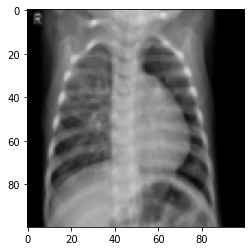

In [ ]:
show_example(*dataset_train[3119])

In [ ]:
import jovian
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ishaanchugh06/xray-test


'https://jovian.ai/ishaanchugh06/xray-test'

# **Data loading and batch creation**

In [ ]:
random_seed = 0
torch.manual_seed(random_seed);

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size = 20

In [ ]:
val_size = 1000
train_size = len(dataset_train) - val_size

data_train, data_val = random_split(dataset_train, [train_size, val_size])
len(data_train), len(data_val)

(4216, 1000)

In [ ]:
train_dl = DataLoader(data_train, batch_size, shuffle = True, num_workers= 4, pin_memory=True)
val_dl = DataLoader(data_val, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DataLoader(dataset_test, batch_size*2, num_workers=4, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
  for img, label in dl:
    fig, ax = plt.subplots(figsize = (16, 12))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(img, nrow = 16).permute(1,2,0))
    break

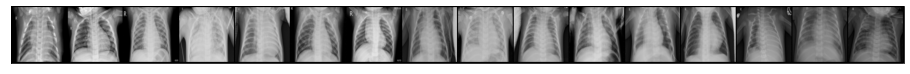

In [ ]:
show_batch(train_dl)

In [ ]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/ishaanchugh06/xray-test


'https://jovian.ai/ishaanchugh06/xray-test'

# **Model creation+Training**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
sample_model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.MaxPool2d(2, 2)
)

In [ ]:
for images, labels in train_dl:
    print("images shape: ", images.shape)
    out = sample_model(images)
    print("out shape", out.shape)
    break

images shape:  torch.Size([16, 3, 100, 100])
out shape torch.Size([16, 32, 50, 50])


In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class XRayCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output size: 64 x 50 x 50
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output size: 128 x 25 x 25
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output size: 256 x 12 x 12
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output size: 512 x 6 x 6
            
            nn.Flatten(),
            nn.Linear(512*6*6, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 2))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = XRayCnnModel()
model

XRayCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3, 3), stride=(1,

In [ ]:
for images, labels in train_dl:
    print("images shape: ", images.shape)
    out = model(images)
    print("out shape: ", out.shape)
    print("out[0]: ", out[0])
    break

images shape:  torch.Size([16, 3, 100, 100])
out shape:  torch.Size([16, 2])
out[0]:  tensor([0.3061, 0.2339], grad_fn=<SelectBackward>)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
device

device(type='cuda')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
train_loader = DeviceDataLoader(train_dl, device)
val_loader = DeviceDataLoader(val_dl, device)
test_loader = DeviceDataLoader(test_dl, device)
to_device(model, device);

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(XRayCnnModel(), device)

In [ ]:
model

XRayCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3, 3), stride=(1,

In [ ]:
#Initial Accuracy of the model

evaluate(model, val_loader)

{'val_acc': 0.25390625, 'val_loss': 0.8276565074920654}

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [ ]:
history = fit(num_epochs, lr, model, train_loader, val_loader, opt_func)

Epoch [0], train_loss: 0.6211, val_loss: 0.4751, val_acc: 0.7461
Epoch [1], train_loss: 0.5204, val_loss: 0.5075, val_acc: 0.7539
Epoch [2], train_loss: 0.4104, val_loss: 0.2989, val_acc: 0.8818
Epoch [3], train_loss: 0.3567, val_loss: 0.3258, val_acc: 0.8867
Epoch [4], train_loss: 0.2750, val_loss: 0.2821, val_acc: 0.8994
Epoch [5], train_loss: 0.2059, val_loss: 0.1852, val_acc: 0.9346
Epoch [6], train_loss: 0.1560, val_loss: 0.2058, val_acc: 0.9229
Epoch [7], train_loss: 0.1441, val_loss: 0.2432, val_acc: 0.9287
Epoch [8], train_loss: 0.1202, val_loss: 0.1355, val_acc: 0.9541
Epoch [9], train_loss: 0.1212, val_loss: 0.1326, val_acc: 0.9600


In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

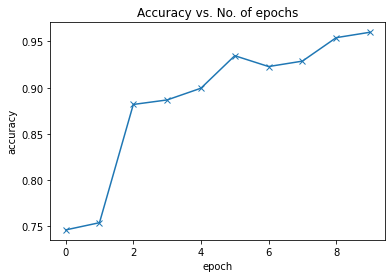

In [ ]:
plot_accuracies(history)

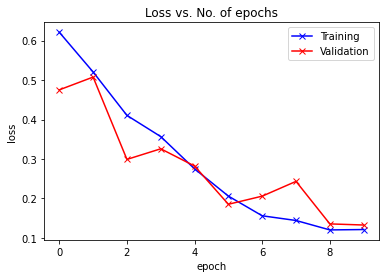

In [ ]:
plot_losses(history)

In [ ]:
result = evaluate(model, test_loader)
result

{'val_acc': 0.8359375, 'val_loss': 0.9893828630447388}

In [ ]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


In [ ]:
torch.save(model.state_dict(), 'XRayCnn.pth')

In [ ]:
model2 = to_device(XRayCnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('XRayCnn.pth'))

<All keys matched successfully>

In [ ]:
evaluate(model2, test_loader)

{'val_acc': 0.8359375, 'val_loss': 0.9893828630447388}

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/ishaanchugh06/xray-classification-project-pytorch


'https://jovian.ai/ishaanchugh06/xray-classification-project-pytorch'